In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [12]:
# Read CSV file
df1 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection1.csv")
df2 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection2.csv")
df3 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection3.csv")
df4 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection4.csv")
df5 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection5.csv")
df6 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection6.csv")
df7 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection7.csv")
df8 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection8.csv")
emotion_csv = pd.concat([df1,df2,df3, df4, df5, df6, df7, df8])

In [3]:
# Read Fer Dataset
emotion_fer = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection_fer.csv")

# Read archieve Dataset
emotion_archieve = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection_archieve.csv")

In [13]:
emotion_csv


,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1243.0,0.0,0.0,0.0,Sad
4250,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1244.0,0.0,0.0,0.0,Sad
4251,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1245.0,0.0,0.0,0.0,Sad
4252,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1246.0,0.0,0.0,0.0,Sad


In [4]:
emotion_fer

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,0.0,0.925,0.139736,0.007881,-0.990157,-0.137448,0.102825,-0.985157,0.001,0.056,...,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,Surprise
55805,0.0,0.975,0.122387,0.206409,-0.970782,-0.186570,0.204941,-0.960828,-0.033,0.210,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Surprise
55806,0.0,0.875,0.202438,0.153139,-0.967247,-0.051613,0.206195,-0.977149,0.077,0.183,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Surprise
55807,0.0,0.975,0.157565,0.120525,-0.980126,-0.100528,0.089008,-0.990945,0.029,0.106,...,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Surprise


In [5]:
emotion_archieve

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,0.0,0.925,0.139736,0.007881,-0.990157,-0.137448,0.102825,-0.985157,0.001,0.056,...,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,Surprise
55805,0.0,0.975,0.122387,0.206409,-0.970782,-0.186570,0.204941,-0.960828,-0.033,0.210,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Surprise
55806,0.0,0.875,0.202438,0.153139,-0.967247,-0.051613,0.206195,-0.977149,0.077,0.183,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Surprise
55807,0.0,0.975,0.157565,0.120525,-0.980126,-0.100528,0.089008,-0.990945,0.029,0.106,...,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Surprise


In [ ]:
# list of columns
list(emotion_csv.columns)

## Class Imbalance

In [3]:
# Count the occurance of each emotion to see if bias can occur
emotion_csv["Emotion Detected"].value_counts()

Happy       24538
Neutral     15290
Sad         14854
Anger       12903
Surprise    11166
Fear        10796
Disgust      1910
Contempt      239
Name: Emotion Detected, dtype: int64

In [14]:
# Plot the class imbalance
def plotimbalance(csvname, column, title):
    unique, counts = np.unique(csvname[column], return_counts=True)
    plt.bar(unique, counts)
    plt.xticks()
    plt.ylabel('Number of Samples')
    plt.xlabel('Emotion Detected')
    plt.title(title)
    plt.show()

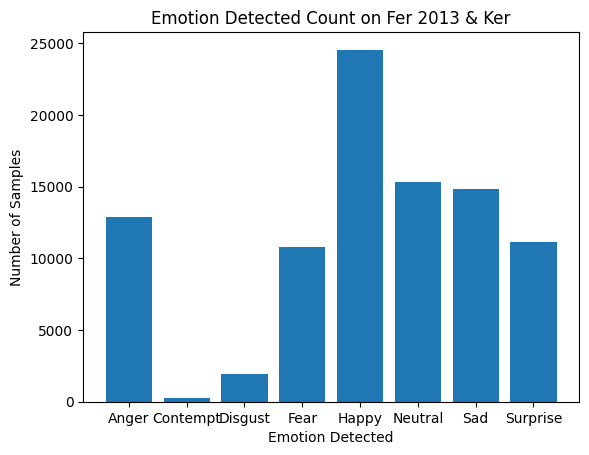

In [15]:
plotimbalance(emotion_csv, "Emotion Detected", "Emotion Detected Count on Fer 2013 & Ker")


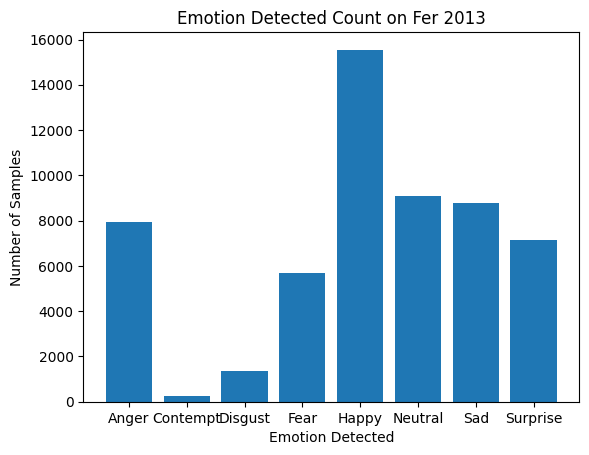

In [16]:
plotimbalance(emotion_fer, "Emotion Detected", "Emotion Detected Count on Fer 2013")

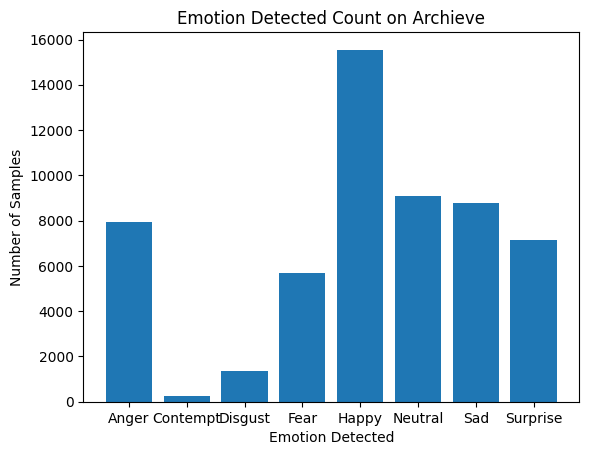

In [17]:
plotimbalance(emotion_archieve, "Emotion Detected", "Emotion Detected Count on Archieve")

In [104]:
# Replace each emotion with a number value
emotion_csv = emotion_csv.replace(
            {"Happy": 1,
            "Neutral": 2,
            "Sad":3 ,
            "Anger": 4 ,
            "Surprise": 5 ,
            "Disgust":6 ,
            "Contempt": 7, 
            "Fear": 8})

# Remove unnesscary columns for csv with all emotions
emotion_csv = emotion_csv.drop(columns=["frame","face_id", "timestamp", "success", "face"])

emotion_csv

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,59.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,40.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,67.1,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,63.4,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,60.4,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [18]:
# Replace each emotion with a number value
emotion_fer = emotion_fer.replace(
            {"Happy": 1,
            "Neutral": 2,
            "Sad":3 ,
            "Anger": 4 ,
            "Surprise": 5 ,
            "Disgust":6 ,
            "Contempt": 7, 
            "Fear": 8})

# Remove unnesscary columns for csv with all emotions
emotion_fer = emotion_fer.drop(columns=["frame","face_id", "timestamp", "success", "face"])

emotion_csv

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1243.0,0.0,0.0,0.0,Sad
4250,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1244.0,0.0,0.0,0.0,Sad
4251,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1245.0,0.0,0.0,0.0,Sad
4252,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1246.0,0.0,0.0,0.0,Sad


In [19]:
# Replace each emotion with a number value
emotion_archieve = emotion_archieve.replace(
            {"Happy": 1,
            "Neutral": 2,
            "Sad":3 ,
            "Anger": 4 ,
            "Surprise": 5 ,
            "Disgust":6 ,
            "Contempt": 7, 
            "Fear": 8})

# Remove unnesscary columns for csv with all emotions
emotion_archieve = emotion_archieve.drop(columns=["frame","face_id", "timestamp", "success", "face"])

emotion_archieve

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,59.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,40.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,67.1,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,63.4,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,60.4,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,0.925,0.139736,0.007881,-0.990157,-0.137448,0.102825,-0.985157,0.001,0.056,59.3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5
55805,0.975,0.122387,0.206409,-0.970782,-0.186570,0.204941,-0.960828,-0.033,0.210,67.5,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5
55806,0.875,0.202438,0.153139,-0.967247,-0.051613,0.206195,-0.977149,0.077,0.183,55.8,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5
55807,0.975,0.157565,0.120525,-0.980126,-0.100528,0.089008,-0.990945,0.029,0.106,65.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5


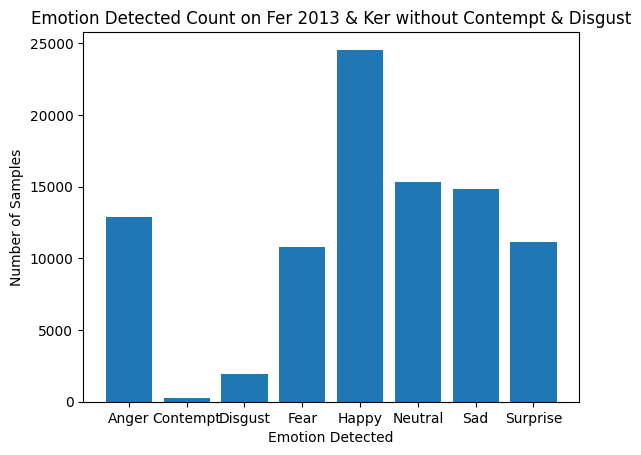

In [58]:
""" 
To deal with the class imbalance we are taking the following approaches:
- Remove the emotions contempt and disgust 
- Oversample the emotions: contempt and disgust
- Undersample the emotion: Happy
"""

# 1. Remove the emotions: Contempt and Disgust
emotion_csv_without_c_d = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 7].index)
emotion_csv_without_c_d = emotion_csv_without_c_d.drop(emotion_csv_without_c_d[emotion_csv_without_c_d['Emotion Detected'] == 6].index)
emotion_csv_without_c_d["Emotion Detected"].value_counts()

# Plot the class imbalance after removing the emotions
plotimbalance(emotion_csv_without_c_d, "Emotion Detected", "Emotion Detected Count on Fer 2013 & Ker without Contempt & Disgust")

In [59]:
# Remove Contempt and Disgust from the Fer & Archieve Dataset
# 1. Remove the emotions: Contempt and Disgust
emotion_archieve = emotion_archieve.drop(emotion_archieve[emotion_archieve['Emotion Detected'] == 7].index)
emotion_archieve = emotion_archieve.drop(emotion_archieve[emotion_archieve['Emotion Detected'] == 6].index)
emotion_archieve

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,...,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.00,0.82,0.00,1.13,0.12,0.00,0.00,0.18,0.00,4
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.00,0.00,0.00,0.00,1.34,0.00,0.00,0.00,0.22,4
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.83,1.22,0.14,0.96,0.00,0.00,0.00,4
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.00,0.70,0.68,1.06,1.03,0.40,0.00,1.00,0.00,4
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.22,0.48,0.00,0.99,0.90,0.24,0.00,0.00,0.36,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.59,1.93,0.00,5
55805,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.55,2.60,0.49,1.09,0.00,0.00,0.00,5
55806,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.97,0.80,1.00,1.51,2.43,0.84,0.51,0.00,0.00,5
55807,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.05,0.00,0.93,0.00,1.50,0.84,0.00,5


In [24]:
# Remove Contempt and Disgust from the Fer & Archieve Dataset
# 1. Remove the emotions: Contempt and Disgust
emotion_fer = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 7].index)
emotion_fer = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 6].index)
emotion_fer

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,59.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,40.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,67.1,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,63.4,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,60.4,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,0.925,0.139736,0.007881,-0.990157,-0.137448,0.102825,-0.985157,0.001,0.056,59.3,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5
55805,0.975,0.122387,0.206409,-0.970782,-0.186570,0.204941,-0.960828,-0.033,0.210,67.5,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5
55806,0.875,0.202438,0.153139,-0.967247,-0.051613,0.206195,-0.977149,0.077,0.183,55.8,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5
55807,0.975,0.157565,0.120525,-0.980126,-0.100528,0.089008,-0.990945,0.029,0.106,65.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5


In [25]:
# Class Labels 
emotion_class = emotion_csv["Emotion Detected"]
emotion_csv_without_c_d_class = emotion_csv_without_c_d["Emotion Detected"]

# Class Labels 
emotion_fer_class = emotion_fer["Emotion Detected"]
emotion_archieve_class = emotion_archieve["Emotion Detected"]


In [108]:
emotion_csv_without_c_d

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.975,0.154244,0.078627,-0.984899,-0.088668,0.071323,-0.993504,0.033,0.076,69.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.975,0.138883,0.103756,-0.984859,-0.226270,0.135969,-0.964528,-0.045,0.122,63.1,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.875,0.223451,0.093836,-0.970188,-0.134327,0.273706,-0.952387,0.046,0.189,50.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,0.025,-0.050798,-0.068885,-0.996330,-0.239529,-0.072698,-0.968164,-0.147,-0.072,107.7,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.975,0.065336,0.115178,-0.991194,-0.228905,0.108176,-0.967420,-0.083,0.114,69.9,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [109]:
emotion_csv

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,59.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,40.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,67.1,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,63.4,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,60.4,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [110]:
# Check what emotions are in the dataframe
emotion_csv["Emotion Detected"].unique()

array([4, 8, 6, 3, 7, 1, 2, 5])

In [111]:
# Check what emotions are in the dataframe to ensure contempt and disgust is not in there
emotion_csv_without_c_d["Emotion Detected"].unique()

array([4, 8, 3, 1, 2, 5])

In [112]:
# Columns with the Action Unit Presence for without and with contempt and disgust
emotion_csv_without_c_d_presence = emotion_csv_without_c_d[[
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Emotion Detected']]

emotion_csv_presence = emotion_csv[[
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Emotion Detected']]

In [113]:
emotion_csv_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [114]:
emotion_csv_without_c_d_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [115]:
# Columns with the Action Unit Intensity for both csv files
emotion_csv_without_c_d_intensity = emotion_csv_without_c_d[[
'AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']]


emotion_csv_intensity = emotion_csv[
['AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']
]

In [1]:
emotion_csv_without_c_d_intensity 

NameError: name 'emotion_csv_without_c_d_intensity' is not defined

In [117]:
emotion_csv_intensity

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
0,0.00,0.00,1.40,0.00,0.00,0.02,0.42,1.05,0.00,0.82,0.00,1.13,0.12,0.00,0.0,0.18,0.00,4
1,2.10,1.84,0.20,2.59,0.00,0.61,0.13,0.00,0.00,0.00,0.00,0.00,1.34,0.00,0.0,0.00,0.22,4
2,0.22,0.63,1.42,2.31,0.00,0.00,0.00,0.00,0.00,0.00,0.83,1.22,0.14,0.96,0.0,0.00,0.00,4
3,0.00,0.00,0.00,2.17,0.00,0.19,0.18,1.25,0.00,0.70,0.68,1.06,1.03,0.40,0.0,1.00,0.00,4
4,0.00,0.00,1.55,0.00,1.01,1.85,0.54,0.00,0.22,0.48,0.00,0.99,0.90,0.24,0.0,0.00,0.36,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4250,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4252,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3


In [118]:
# CSV file made out of the 3d landmarks of face for both csv files
emotion_csv_without_c_d_3d_landmarks = emotion_csv_without_c_d[[
'X_0',
'X_1',
'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'Y_0',
 'Y_1',
 'Y_2',
 'Y_3',
 'Y_4',
 'Y_5',
 'Y_6',
 'Y_7',
 'Y_8',
 'Y_9',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_15',
 'Y_16',
 'Y_17',
 'Y_18',
 'Y_19',
 'Y_20',
 'Y_21',
 'Y_22',
 'Y_23',
 'Y_24',
 'Y_25',
 'Y_26',
 'Y_27',
 'Y_28',
 'Y_29',
 'Y_30',
 'Y_31',
 'Y_32',
 'Y_33',
 'Y_34',
 'Y_35',
 'Y_36',
 'Y_37',
 'Y_38',
 'Y_39',
 'Y_40',
 'Y_41',
 'Y_42',
 'Y_43',
 'Y_44',
 'Y_45',
 'Y_46',
 'Y_47',
 'Y_48',
 'Y_49',
 'Y_50',
 'Y_51',
 'Y_52',
 'Y_53',
 'Y_54',
 'Y_55',
 'Y_56',
 'Y_57',
 'Y_58',
 'Y_59',
 'Y_60',
 'Y_61',
 'Y_62',
 'Y_63',
 'Y_64',
 'Y_65',
 'Y_66',
 'Y_67',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Z_8',
 'Z_9',
 'Z_10',
 'Z_11',
 'Z_12',
 'Z_13',
 'Z_14',
 'Z_15',
 'Z_16',
 'Z_17',
 'Z_18',
 'Z_19',
 'Z_20',
 'Z_21',
 'Z_22',
 'Z_23',
 'Z_24',
 'Z_25',
 'Z_26',
 'Z_27',
 'Z_28',
 'Z_29',
 'Z_30',
 'Z_31',
 'Z_32',
 'Z_33',
 'Z_34',
 'Z_35',
 'Z_36',
 'Z_37',
 'Z_38',
 'Z_39',
 'Z_40',
 'Z_41',
 'Z_42',
 'Z_43',
 'Z_44',
 'Z_45',
 'Z_46',
 'Z_47',
 'Z_48',
 'Z_49',
 'Z_50',
 'Z_51',
 'Z_52',
 'Z_53',
 'Z_54',
 'Z_55',
 'Z_56',
 'Z_57',
 'Z_58',
 'Z_59',
 'Z_60',
 'Z_61',
 'Z_62',
 'Z_63',
 'Z_64',
 'Z_65',
 'Z_66',
 'Z_67',
 'Emotion Detected']]

emotion_csv_3d_landmarks = emotion_csv[[
'X_0',
'X_1',
'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'Y_0',
 'Y_1',
 'Y_2',
 'Y_3',
 'Y_4',
 'Y_5',
 'Y_6',
 'Y_7',
 'Y_8',
 'Y_9',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_15',
 'Y_16',
 'Y_17',
 'Y_18',
 'Y_19',
 'Y_20',
 'Y_21',
 'Y_22',
 'Y_23',
 'Y_24',
 'Y_25',
 'Y_26',
 'Y_27',
 'Y_28',
 'Y_29',
 'Y_30',
 'Y_31',
 'Y_32',
 'Y_33',
 'Y_34',
 'Y_35',
 'Y_36',
 'Y_37',
 'Y_38',
 'Y_39',
 'Y_40',
 'Y_41',
 'Y_42',
 'Y_43',
 'Y_44',
 'Y_45',
 'Y_46',
 'Y_47',
 'Y_48',
 'Y_49',
 'Y_50',
 'Y_51',
 'Y_52',
 'Y_53',
 'Y_54',
 'Y_55',
 'Y_56',
 'Y_57',
 'Y_58',
 'Y_59',
 'Y_60',
 'Y_61',
 'Y_62',
 'Y_63',
 'Y_64',
 'Y_65',
 'Y_66',
 'Y_67',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Z_8',
 'Z_9',
 'Z_10',
 'Z_11',
 'Z_12',
 'Z_13',
 'Z_14',
 'Z_15',
 'Z_16',
 'Z_17',
 'Z_18',
 'Z_19',
 'Z_20',
 'Z_21',
 'Z_22',
 'Z_23',
 'Z_24',
 'Z_25',
 'Z_26',
 'Z_27',
 'Z_28',
 'Z_29',
 'Z_30',
 'Z_31',
 'Z_32',
 'Z_33',
 'Z_34',
 'Z_35',
 'Z_36',
 'Z_37',
 'Z_38',
 'Z_39',
 'Z_40',
 'Z_41',
 'Z_42',
 'Z_43',
 'Z_44',
 'Z_45',
 'Z_46',
 'Z_47',
 'Z_48',
 'Z_49',
 'Z_50',
 'Z_51',
 'Z_52',
 'Z_53',
 'Z_54',
 'Z_55',
 'Z_56',
 'Z_57',
 'Z_58',
 'Z_59',
 'Z_60',
 'Z_61',
 'Z_62',
 'Z_63',
 'Z_64',
 'Z_65',
 'Z_66',
 'Z_67',
 'Emotion Detected']]

In [29]:
# Make the datagrame only contains the columns for intensity and presence
emotion_fer = emotion_fer[[
'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']]

emotion_archieve = emotion_archieve[[
'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']]

## Normalization + SMOTE

In [55]:
# 2. Oversample the emotions: Contempt and disgust
def oversampling(x, y):
    # 2b. Set the sample size for each emotion class for oversampling
    #print(x_train["Emotion Detected"].value_counts())
    strategy = {4:10010 , #Anger
                5:10009 , #Surprise
                6: 10011 , #Disgust
                7: 10007, #Contempt
                8: 10008} #Fear
 
    # 2c. Apply the SMOTE for oversampling: Anger, Surprise, Disgust, Contempt, and Fear
    oversample = SMOTE(sampling_strategy=strategy)
    X, y = oversample.fit_resample(x, y)

    # 2d. Apply undersampling to Happy
    sampling_strategy = {1: 10012}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    x_over, y_over = rus.fit_resample(X, y)

    # 2g. Remove the Emotion Detected column in the X_res and replace the values 
    x_over.drop(columns="Emotion Detected")
    
    y_over = y_over.replace({
                1: "Happy",
                2: "Neutral",
                3: "Sad", 
                4: "Anger",
                5: "Surprise",
                6: "Disgust", 
                7: "Contempt",
                8: "Fear"})
     
    return x_over, y_over

In [56]:
# 3. Undersample the emotion: Happy with Contempt and Disgust removed
def unsample(x, y):
    
    # 3b. Undersample emotion: Happy in the training dataset
    sampling_strategy = {1: 9000}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    X_res, y_res = rus.fit_resample(x, y)
    
    # print(X_res["Emotion Detected"].value_counts()
    
    # Remove the Emotion Detected Column in the X_res
    X_res.drop(columns="Emotion Detected")
    
    return X_res, y_res

In [ ]:
# Normalize the values in Intesnity by using Z-Score Mean

## Training and Testing Spilts

In [57]:
 # Split the new dataframe into training and testing sets for without emotions disgust and contempt
x_train_without_p, x_test_without_p, y_train_without_p, y_test_without_p = train_test_split(emotion_csv_without_c_d_presence, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

x_train_without_i, x_test_without_i, y_train_without_i, y_test_without_i = train_test_split(emotion_csv_without_c_d_intensity, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

x_train_without_l, x_test_without_l, y_train_without_l, y_test_without_l = train_test_split(emotion_csv_without_c_d_3d_landmarks, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

NameError: name 'emotion_csv_without_c_d_presence' is not defined

In [122]:
# Drop Emotion Detected column from without contempt and disgsut dataframes
x_test_without_p = x_test_without_p.drop(columns="Emotion Detected")
x_test_without_i = x_test_without_i.drop(columns="Emotion Detected")
x_test_without_l = x_test_without_l.drop(columns="Emotion Detected")

In [123]:
emotion_csv_without_c_d_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [124]:
 # Split the new dataframe into training and testing sets 
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(emotion_csv_presence, emotion_class, test_size=0.33, random_state=42)

x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(emotion_csv_intensity, emotion_class, test_size=0.33, random_state=42)

x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(emotion_csv_3d_landmarks, emotion_class, test_size=0.33, random_state=42)

In [126]:
# Drop the Emotion Detected Column from all test columns
x_test_p = x_test_p.drop(columns="Emotion Detected")
x_test_i = x_test_i.drop(columns="Emotion Detected")
x_test_l = x_test_l.drop(columns="Emotion Detected")

In [127]:
y_test_p

4475     1
7752     8
12934    1
11069    1
1714     2
        ..
6291     8
11798    1
19832    3
4562     1
3198     1
Name: Emotion Detected, Length: 30260, dtype: int64

In [128]:
# Replace Value
y_test_p = y_test_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_test_p

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [129]:
y_test_i = y_test_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_test_i

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [130]:
y_test_l = y_test_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})

y_test_l

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [194]:
y_test_without_i = y_test_without_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            8: "Fear"})
y_test_without_i

20236         Sad
11724    Surprise
10059        Fear
12423       Happy
3205        Happy
           ...   
10941     Neutral
474         Happy
7792      Neutral
1204      Neutral
10285        Fear
Name: Emotion Detected, Length: 26854, dtype: object

In [195]:
y_test_without_l = y_test_without_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            8: "Fear"})
y_test_without_l

20236         Sad
11724    Surprise
10059        Fear
12423       Happy
3205        Happy
           ...   
10941     Neutral
474         Happy
7792      Neutral
1204      Neutral
10285        Fear
Name: Emotion Detected, Length: 26854, dtype: object

In [196]:
y_test_without_p = y_test_without_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            8: "Fear"})
y_test_without_p

20236         Sad
11724    Surprise
10059        Fear
12423       Happy
3205        Happy
           ...   
10941     Neutral
474         Happy
7792      Neutral
1204      Neutral
10285        Fear
Name: Emotion Detected, Length: 26854, dtype: object

In [132]:
# Apply the oversample function 
x_over_p, y_over_p = oversampling(x_train_p, y_train_p)
x_over_i, y_over_i = oversampling(x_train_i, y_train_i)
x_over_l, y_over_l = oversampling(x_train_l, y_train_l)

In [133]:
x_over_p

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
11806,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1
6627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
25376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
30590,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8
86626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8
86627,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.862868,0.0,1.0,0.0,1.0,0.862868,0.0,1.0,8
86628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,8


In [134]:
x_train_p

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
1781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2
1637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4
15333,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5
9312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
860,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4


In [135]:
# Apply the undersample function
x_under_without_p, y_under_without_p = unsample(x_train_without_p, y_train_without_p)
x_under_without_i, y_under_without_i =unsample(x_train_without_i, y_train_without_i)
x_under_without_l, y_under_without_l = unsample(x_train_without_l, y_train_without_l)

In [136]:
x_train_without_i

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
20227,0.76,0.11,0.04,0.28,0.00,0.00,0.00,0.00,0.07,0.00,0.14,0.67,0.13,0.00,1.60,0.53,0.00,3
11086,0.49,0.42,0.06,0.32,0.00,0.03,0.00,0.00,0.00,0.00,0.30,1.20,0.00,0.00,0.12,0.59,0.02,5
12162,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.27,0.54,0.00,0.05,1.01,0.26,1.42,1.12,0.44,0.08,5
2355,0.00,0.00,0.00,0.16,1.65,0.00,0.09,2.54,2.86,1.33,0.00,0.14,1.05,0.00,2.33,0.12,0.00,1
447,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,1.32,2.27,0.00,0.03,0.00,0.00,0.18,0.97,0.70,1.63,0.98,0.15,1.46,0.00,1.21,0.00,0.44,4
6113,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
2273,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
1099,0.00,0.00,0.85,0.00,0.00,2.28,0.00,0.00,0.00,0.00,0.00,1.35,0.17,0.00,0.16,0.05,0.63,4


In [137]:
x_under_without_i

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
6021,0.10,0.22,0.62,0.00,1.14,0.24,0.45,0.29,0.96,0.96,0.65,0.66,0.25,0.05,0.38,0.29,0.04,1
10938,0.01,0.00,0.28,0.25,0.99,0.69,0.89,1.16,1.24,0.64,0.44,0.77,0.11,0.29,0.98,0.24,0.63,1
872,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
6341,0.00,0.00,0.00,0.00,0.56,0.09,0.00,0.97,0.96,0.64,0.00,0.32,0.00,0.00,0.38,0.00,0.00,1
15241,0.00,0.00,0.00,0.00,1.40,0.00,0.00,2.07,1.98,0.96,0.00,0.00,0.49,0.21,1.96,0.43,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,0.47,0.18,0.61,0.65,0.17,0.00,0.00,0.26,0.00,0.00,0.04,0.93,0.00,0.16,1.10,0.48,0.14,8
11413,0.00,0.00,0.00,0.00,0.72,0.93,0.76,0.73,0.36,0.00,0.41,0.00,0.00,0.00,0.64,0.00,0.51,8
12180,2.03,1.94,0.52,1.95,0.00,0.00,0.00,0.00,0.00,0.00,0.21,1.17,0.84,0.52,0.25,1.01,0.00,8
4934,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8


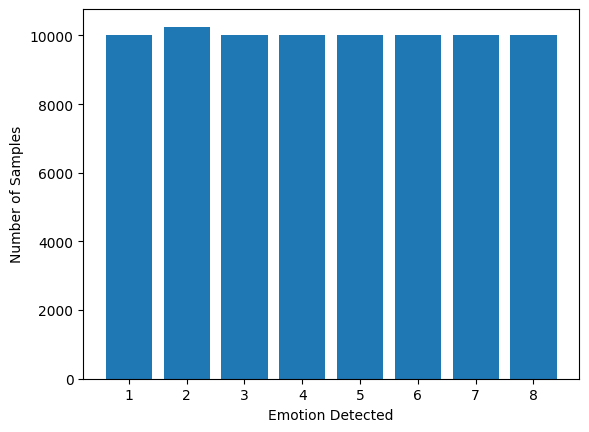

In [138]:
# 3c. Plot to see if there is an imbalance ?
plotimbalance(x_over_p, "Emotion Detected")

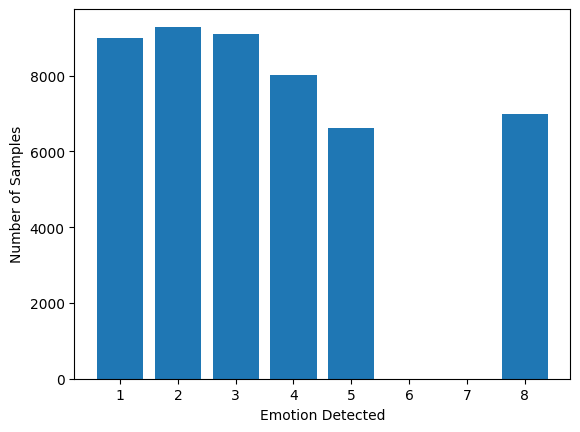

In [139]:
# 3c. Plot to see if there is an imbalance after undersampling happy
plotimbalance(x_under_without_p, "Emotion Detected")

In [140]:
x_under_without_p

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
2888,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3196,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1
1787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1023,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1
5772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
11413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
12180,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,8
4934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [141]:
y_under_without_p

2888     1
3196     1
1787     1
1023     1
5772     1
        ..
9578     8
11413    8
12180    8
4934     8
6113     8
Name: Emotion Detected, Length: 49011, dtype: int64

In [142]:
# Remove Column Emotion Detectwed column after oversampling and undersampling
x_under_without_p = x_under_without_p.drop(columns="Emotion Detected")
x_under_without_i = x_under_without_i.drop(columns="Emotion Detected")
x_under_without_l = x_under_without_l.drop(columns="Emotion Detected")

x_over_p = x_over_p.drop(columns="Emotion Detected")
x_over_i = x_over_i.drop(columns="Emotion Detected")
x_over_l = x_over_l.drop(columns="Emotion Detected")

In [151]:
y_under_without_p = y_under_without_p.replace({1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_under_without_p

2888     Happy
3196     Happy
1787     Happy
1023     Happy
5772     Happy
         ...  
9578      Fear
11413     Fear
12180     Fear
4934      Fear
6113      Fear
Name: Emotion Detected, Length: 49011, dtype: object

In [161]:
y_under_without_l = y_under_without_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_under_without_l

1906     Happy
6341     Happy
10036    Happy
6892     Happy
4273     Happy
         ...  
9578      Fear
11413     Fear
12180     Fear
4934      Fear
6113      Fear
Name: Emotion Detected, Length: 49011, dtype: object

In [155]:
y_under_without_i = y_under_without_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)
y_under_without_i


6021     Happy
10938    Happy
872      Happy
6341     Happy
15241    Happy
         ...  
9578      Fear
11413     Fear
12180     Fear
4934      Fear
6113      Fear
Name: Emotion Detected, Length: 49011, dtype: object

In [156]:
y_over_p = y_over_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

y_over_p

11806    Happy
6627     Happy
25376    Happy
584      Happy
30590    Happy
         ...  
86625     Fear
86626     Fear
86627     Fear
86628     Fear
86629     Fear
Name: Emotion Detected, Length: 80329, dtype: object

In [157]:
y_over_i = y_over_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

y_over_i

56905    Happy
23886    Happy
29319    Happy
4379     Happy
35104    Happy
         ...  
86625     Fear
86626     Fear
86627     Fear
86628     Fear
86629     Fear
Name: Emotion Detected, Length: 80329, dtype: object

In [158]:
y_over_l = y_over_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

y_over_l

2588     Happy
2633     Happy
16942    Happy
53845    Happy
13279    Happy
         ...  
86625     Fear
86626     Fear
86627     Fear
86628     Fear
86629     Fear
Name: Emotion Detected, Length: 80329, dtype: object

## Models

### Support Vector Machine

In [21]:
"""
Fine Tune the Support Vector Machine by finding the best attributes:
 - Kernal: Linear and RBF
 - RBF Kernal: C and Gamma
 - Linear Kernal: C , dual  "Auto"
"""

# Set Kernals
svm_model_rbf = svm.SVC(kernel="rbf")
svm_model_linear = svm.SVC()

# Find the best value for gamma and c
c_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 1000]
gamma_range = [0.1, 1, 10, 100]

param_grid = dict(gamma=gamma_range, C=c_range)

#Create the GridSearchCV object
grid_clf = GridSearchCV(svm.SVC(kernel="rbf"), param_grid)

#Fit the data with the best possible parameters
grid_clf = grid_clf.fit(x_over_i, y_over_i)

#Print the best estimator with it's parameters
print(grid_clf.best_params_)

In [162]:
svm_rbf = svm.SVC(kernel="rbf",
                  C = 10,
                  gamma = 0.1)

#### SVM Model for datasets without emotions: contempt and disgust


In [ ]:
# Presences
svm_rbf_p = svm_rbf.fit(x_under_without_p, y_under_without_p)
svm_y_p = svm_rbf_p.predict(x_test_without_p)

In [171]:
# Intensity
svm_rbf_i = svm_rbf.fit(x_under_without_i, y_under_without_i)
svm_y_i = svm_rbf_i.predict(x_test_without_i)

In [172]:
# Landmarks
svm_rbf_l = svm_rbf.fit(x_under_without_l, y_under_without_l)
svm_y_l = svm_rbf_l.predict(x_test_without_l)

In [297]:
# Presences and Intesity Combines

emotion_csv_without_c_d_i_p = emotion_csv_without_c_d[['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c',
       'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c',
       'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r',
       'AU25_r', 'AU26_r', 'AU45_r', 'Emotion Detected']]

x_train_without_p_i, x_test_without_p_i, y_train_without_p_i, y_test_without_p_i = train_test_split(emotion_csv_without_c_d_i_p, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

# Undersample the Happy Emotion
x_train_under_i_p, y_train_under_i_p = unsample(x_train_without_p_i, y_train_without_p_i)

In [298]:
# Drop Emotion Detected Column and replace interger values with emotion labels
y_test_without_p_i = y_test_without_p_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

y_train_under_i_p = y_train_under_i_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"}
)

x_train_under_i_p = x_train_under_i_p.drop(columns="Emotion Detected")
x_test_without_p_i = x_test_without_p_i.drop(columns="Emotion Detected")

In [300]:
svm_rbf_without_p_i = svm_rbf.fit(x_train_under_i_p, y_train_under_i_p)
svm_rbf_without_y_p_i_ = svm_rbf_without_p_i.predict(x_test_without_p_i)

#### SVM Model for datasets with emotions: contempt and disgust


In [173]:
# SVM Model for datasets with emotions: contempt and disgust
svm_rbf_p_with = svm_rbf.fit(x_over_p, y_over_p)
svm_y_p_with = svm_rbf_p_with.predict(x_test_p)

svm_rbf_i_with = svm_rbf.fit(x_over_i, y_over_i)
svm_y_i_with = svm_rbf_i_with.predict(x_test_i)

svm_rbf_l_with = svm_rbf.fit(x_over_l, y_over_l)
svm_y_l_with = svm_rbf_l_with.predict(x_test_l)


#### SVM [Linear] Model for datasets without emotions: contempt and disgust


In [174]:
svm_linear = LinearSVC(C = 10)

In [175]:
svm_linear_p = svm_linear.fit(x_under_without_p, y_under_without_p)
svm_linear_y_p = svm_linear_p.predict(x_test_without_p)

svm_linear_i = svm_linear.fit(x_under_without_i, y_under_without_i)
svm_linear_y_i = svm_linear_i.predict(x_test_without_i)

svm_linear_l = svm_linear.fit(x_under_without_l, y_under_without_l)
svm_linear_y_l = svm_linear_l.predict(x_test_without_l)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### SVM [Linear] Model for datasets with emotions: contempt and disgust


In [176]:
# SVM Model for datasets with emotions: contempt and disgust
svm_linear_p_with = svm_linear.fit(x_over_p, y_over_p)
svm_linear_y_p_with = svm_linear_p_with.predict(x_test_p)

svm_linear_i_with = svm_linear.fit(x_over_i, y_over_i)
svm_linear_y_i_with = svm_linear_i_with.predict(x_test_i)

svm_linear_l_with = svm_linear.fit(x_over_l, y_over_l)
svm_linear_y_l_with = svm_linear_l_with.predict(x_test_l)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Naives Bayes

In [177]:
# Gaussian NB
gnd = GaussianNB()

# Complement NB
cnb = ComplementNB(alpha=1)

In [178]:
# Gaussian Model for datasets without emotions: contempt and disgust
gnd_p = gnd.fit(x_under_without_p, y_under_without_p)
gnd_p_y = gnd_p.predict(x_test_without_p)

gnd_i = gnd.fit(x_under_without_i, y_under_without_i)
gnd_i_y = gnd_i.predict(x_test_without_i)

gnd_l = gnd.fit(x_under_without_l, y_under_without_l)
gnd_l_y = gnd_l.predict(x_test_without_l)

In [179]:
# Gaussian Model for datasets with emotions: contempt and disgust
gnd_p_with = gnd.fit(x_over_p, y_over_p)
gnd_p_with_y = gnd_p_with.predict(x_test_p)

gnd_i_with = gnd.fit(x_over_i, y_over_i)
gnd_i_with_y = gnd_i_with.predict(x_test_i)

gnd_l_with = gnd.fit(x_over_l, y_over_l)
gnd_l_with_y = gnd_l_with.predict(x_test_l)

In [302]:
gnd_without_p_i = gnd.fit(x_train_under_i_p, y_train_under_i_p)
gnd__without_y_p_i_ = gnd_without_p_i.predict(x_test_without_p_i)

In [180]:
# Complement NB
cnb = ComplementNB(alpha=1)

In [181]:
# Complemnt Model for datasets without emotions: contempt and disgust
cnb_p = cnb.fit(x_under_without_p, y_under_without_p)
cnb_p_y = cnb_p.predict(x_test_without_p)

cnb_i = cnb.fit(x_under_without_i, y_under_without_i)
cnb_i_y = cnb_i.predict(x_test_without_i)

In [182]:
# Complemnt Model for datasets with emotions: contempt and disgust
cnd_p_with = cnb.fit(x_over_p, y_over_p)
cnd_p_with_y = cnd_p_with.predict(x_test_p)

cnd_i_with = cnb.fit(x_over_i, y_over_i)
cnd_i_with_y = cnd_i_with.predict(x_test_i)

### Random Forest

In [183]:
# Fine Tuning Attributes for Random Forest: n_estimators, max_features, min_sample_leaf

# n_estimators = [2, 4, 8, 16, 32, 64, 100]

# max_Features = [Auto, sqrt, 0.2]

# min_sample_leaf = [75, 95, 100]

rf = RandomForestClassifier()

rf_params = {"n_estimators": [2, 4, 8, 16, 32, 64, 100],
             "max_features": ["Auto", "sqrt", "0.2"],
             "min_samples_leaf": [75, 95, 100]}

rf_cv_model = GridSearchCV(rf, rf_params).fit(x_under_without_p, y_under_without_p)

print(rf_cv_model.best_params_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

{'max_features': 'sqrt', 'min_samples_leaf': 75, 'n_estimators': 64}


In [184]:
# Random Forest Model with the best parameters
rf = RandomForestClassifier(max_features= 'sqrt', 
                            min_samples_leaf= 75,
                            n_estimators= 100)

In [45]:
# Random Forest Model for datasets without emotions: contempt and disgust
rf_without_i = rf.fit(x_under_without_i, y_under_without_i)
rf_without_i_y = rf_without_i.predict(x_test_without_i)

rf_without_p = rf.fit(x_under_without_p, y_under_without_p)
rf_without_p_y = rf_without_p.predict(x_test_without_p)

rf_without_l = rf.fit(x_under_without_l, y_under_without_l)
rf_without_l_y = rf_without_l.predict(x_test_without_l)

In [185]:
# Random Forest Model for datasets with emotions
rf_i = rf.fit(x_over_i, y_over_i)
rf_i_y = rf_i.predict(x_test_i)

rf_p = rf.fit(x_over_p, y_over_p)
rf_p_y = rf_p.predict(x_test_p)

rf_l = rf.fit(x_over_l, y_over_l)
rf_l_y = rf_l.predict(x_test_l)

### Decision Tree

In [186]:
# Decision Tree Model
tree = DecisionTreeClassifier(splitter="best",
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1)

In [187]:
# Decision Tree Model for datasets without emotions: contempt and disgust
tree_without_i = tree.fit(x_under_without_i, y_under_without_i)
tree_without_i_y = tree_without_i.predict(x_test_without_i)

tree_without_p = tree.fit(x_under_without_p, y_under_without_p)
tree_without_p_y = tree_without_p.predict(x_test_without_p)

tree_without_l = tree.fit(x_under_without_l, y_under_without_l)
tree_without_l_y = tree_without_l.predict(x_test_without_l)


In [188]:
# Decision Tree Model for datasets with emotions
tree_i = tree.fit(x_over_i, y_over_i)
tree_i_y = tree_i.predict(x_test_i)

tree_p = tree.fit(x_over_p, y_over_p)
tree_p_y = tree_p.predict(x_test_p)

tree_l = tree.fit(x_over_l, y_over_l)
tree_l_y = tree_l.predict(x_test_l)

# Reports

In [49]:
# Metircs on how well the models performed

def metics_reports(y_label_training, y_label_prediction):
    
    # Accuracy Score Prediciton 
    print("Accurary Score")
    print(accuracy_score(y_label_training, y_label_prediction))
    
    # Confusion Matrix Prediciton 
    print("Confusin Matrix Score")
    cm = confusion_matrix(y_label_training, y_label_prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    #F1 Score
    print(f1_score(y_label_training, y_label_prediction, average='macro'))
    
    # Classification Report
    print(classification_report(y_label_training, y_label_prediction))

### Presence

Text(0.5, 1.0, 'Decision Tree With C & D')

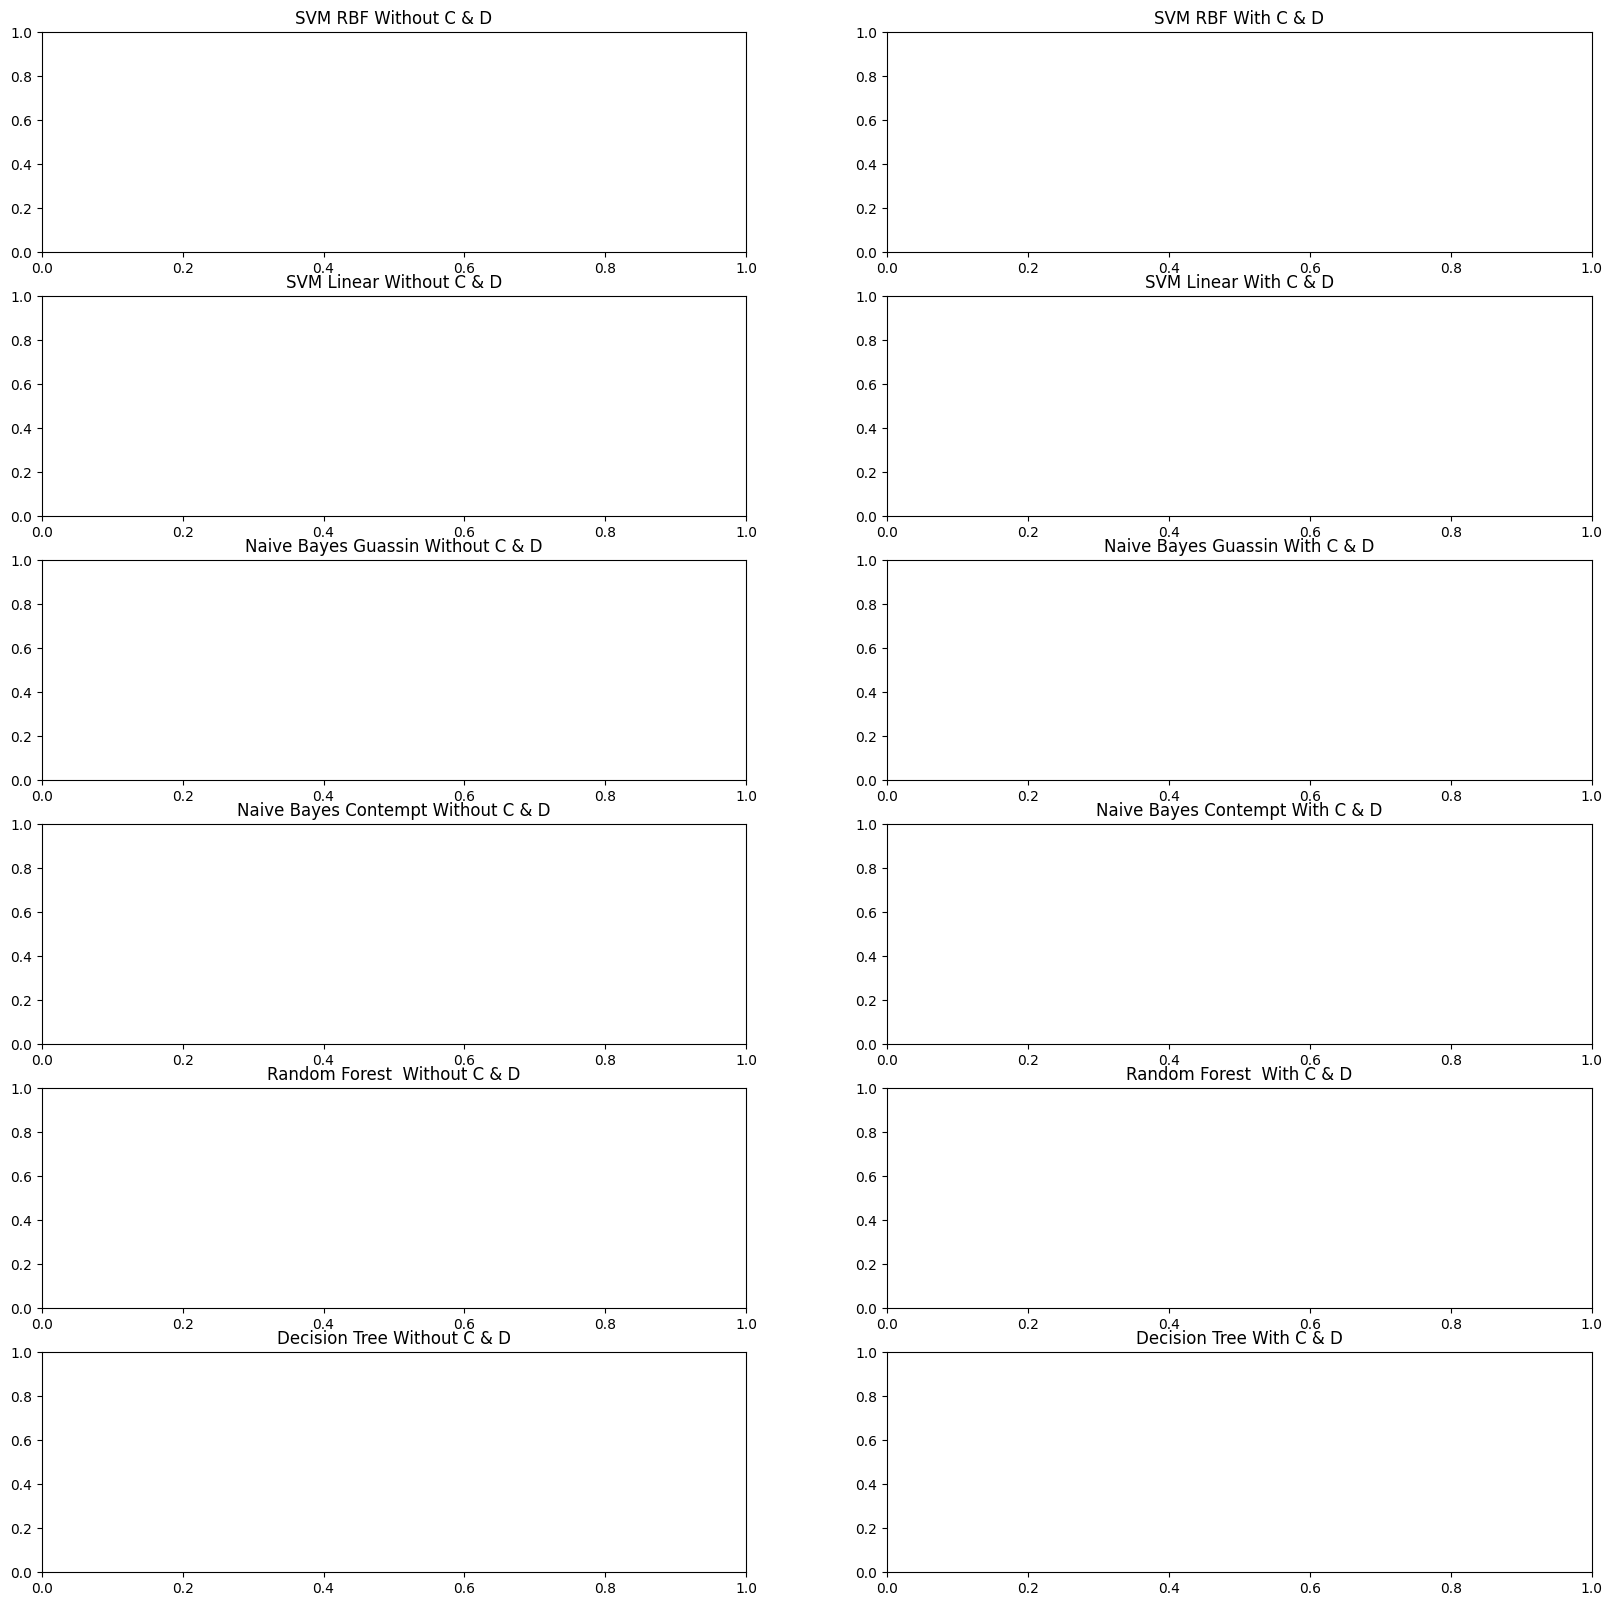

In [54]:
# Create subplots for given confusion matrices
f, axes = plt.subplots(6, 2, figsize=(20, 20))

axes[0][0].set_title("SVM RBF Without C & D")
axes[0][1].set_title("SVM RBF With C & D")

axes[1][0].set_title("SVM Linear Without C & D")
axes[1][1].set_title("SVM Linear With C & D")

axes[2][0].set_title("Naive Bayes Guassin Without C & D")
axes[2][1].set_title("Naive Bayes Guassin With C & D")

axes[3][0].set_title("Naive Bayes Contempt Without C & D")
axes[3][1].set_title("Naive Bayes Contempt With C & D")

axes[4][0].set_title("Random Forest  Without C & D")
axes[4][1].set_title("Random Forest  With C & D")

axes[5][0].set_title("Decision Tree Without C & D")
axes[5][1].set_title("Decision Tree With C & D")

### Intensity

### 3-D Landmark
